In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pip install ultralytics
from ultralytics import YOLO
from IPython.display import display,Image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 9.7 MB/s eta 0:00:00


In [ ]:
!nvidia-smi

Thu Dec 14 11:28:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="UdptetlDAWVk6GjW36uR")
project = rf.workspace("team-roboflow").project("aerial-docks-and-boats")
dataset = project.version(1).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 527.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninsta

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.227, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Aerial-Docks-and-Boats-1 in yolov8:: 100%|██████████| 948/948 [00:00<00:00, 7644.64it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/Aerial-Docks-and-Boats-1/data.yaml epochs=25 imgsz=640

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Aerial-Docks-and-Boats-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=N

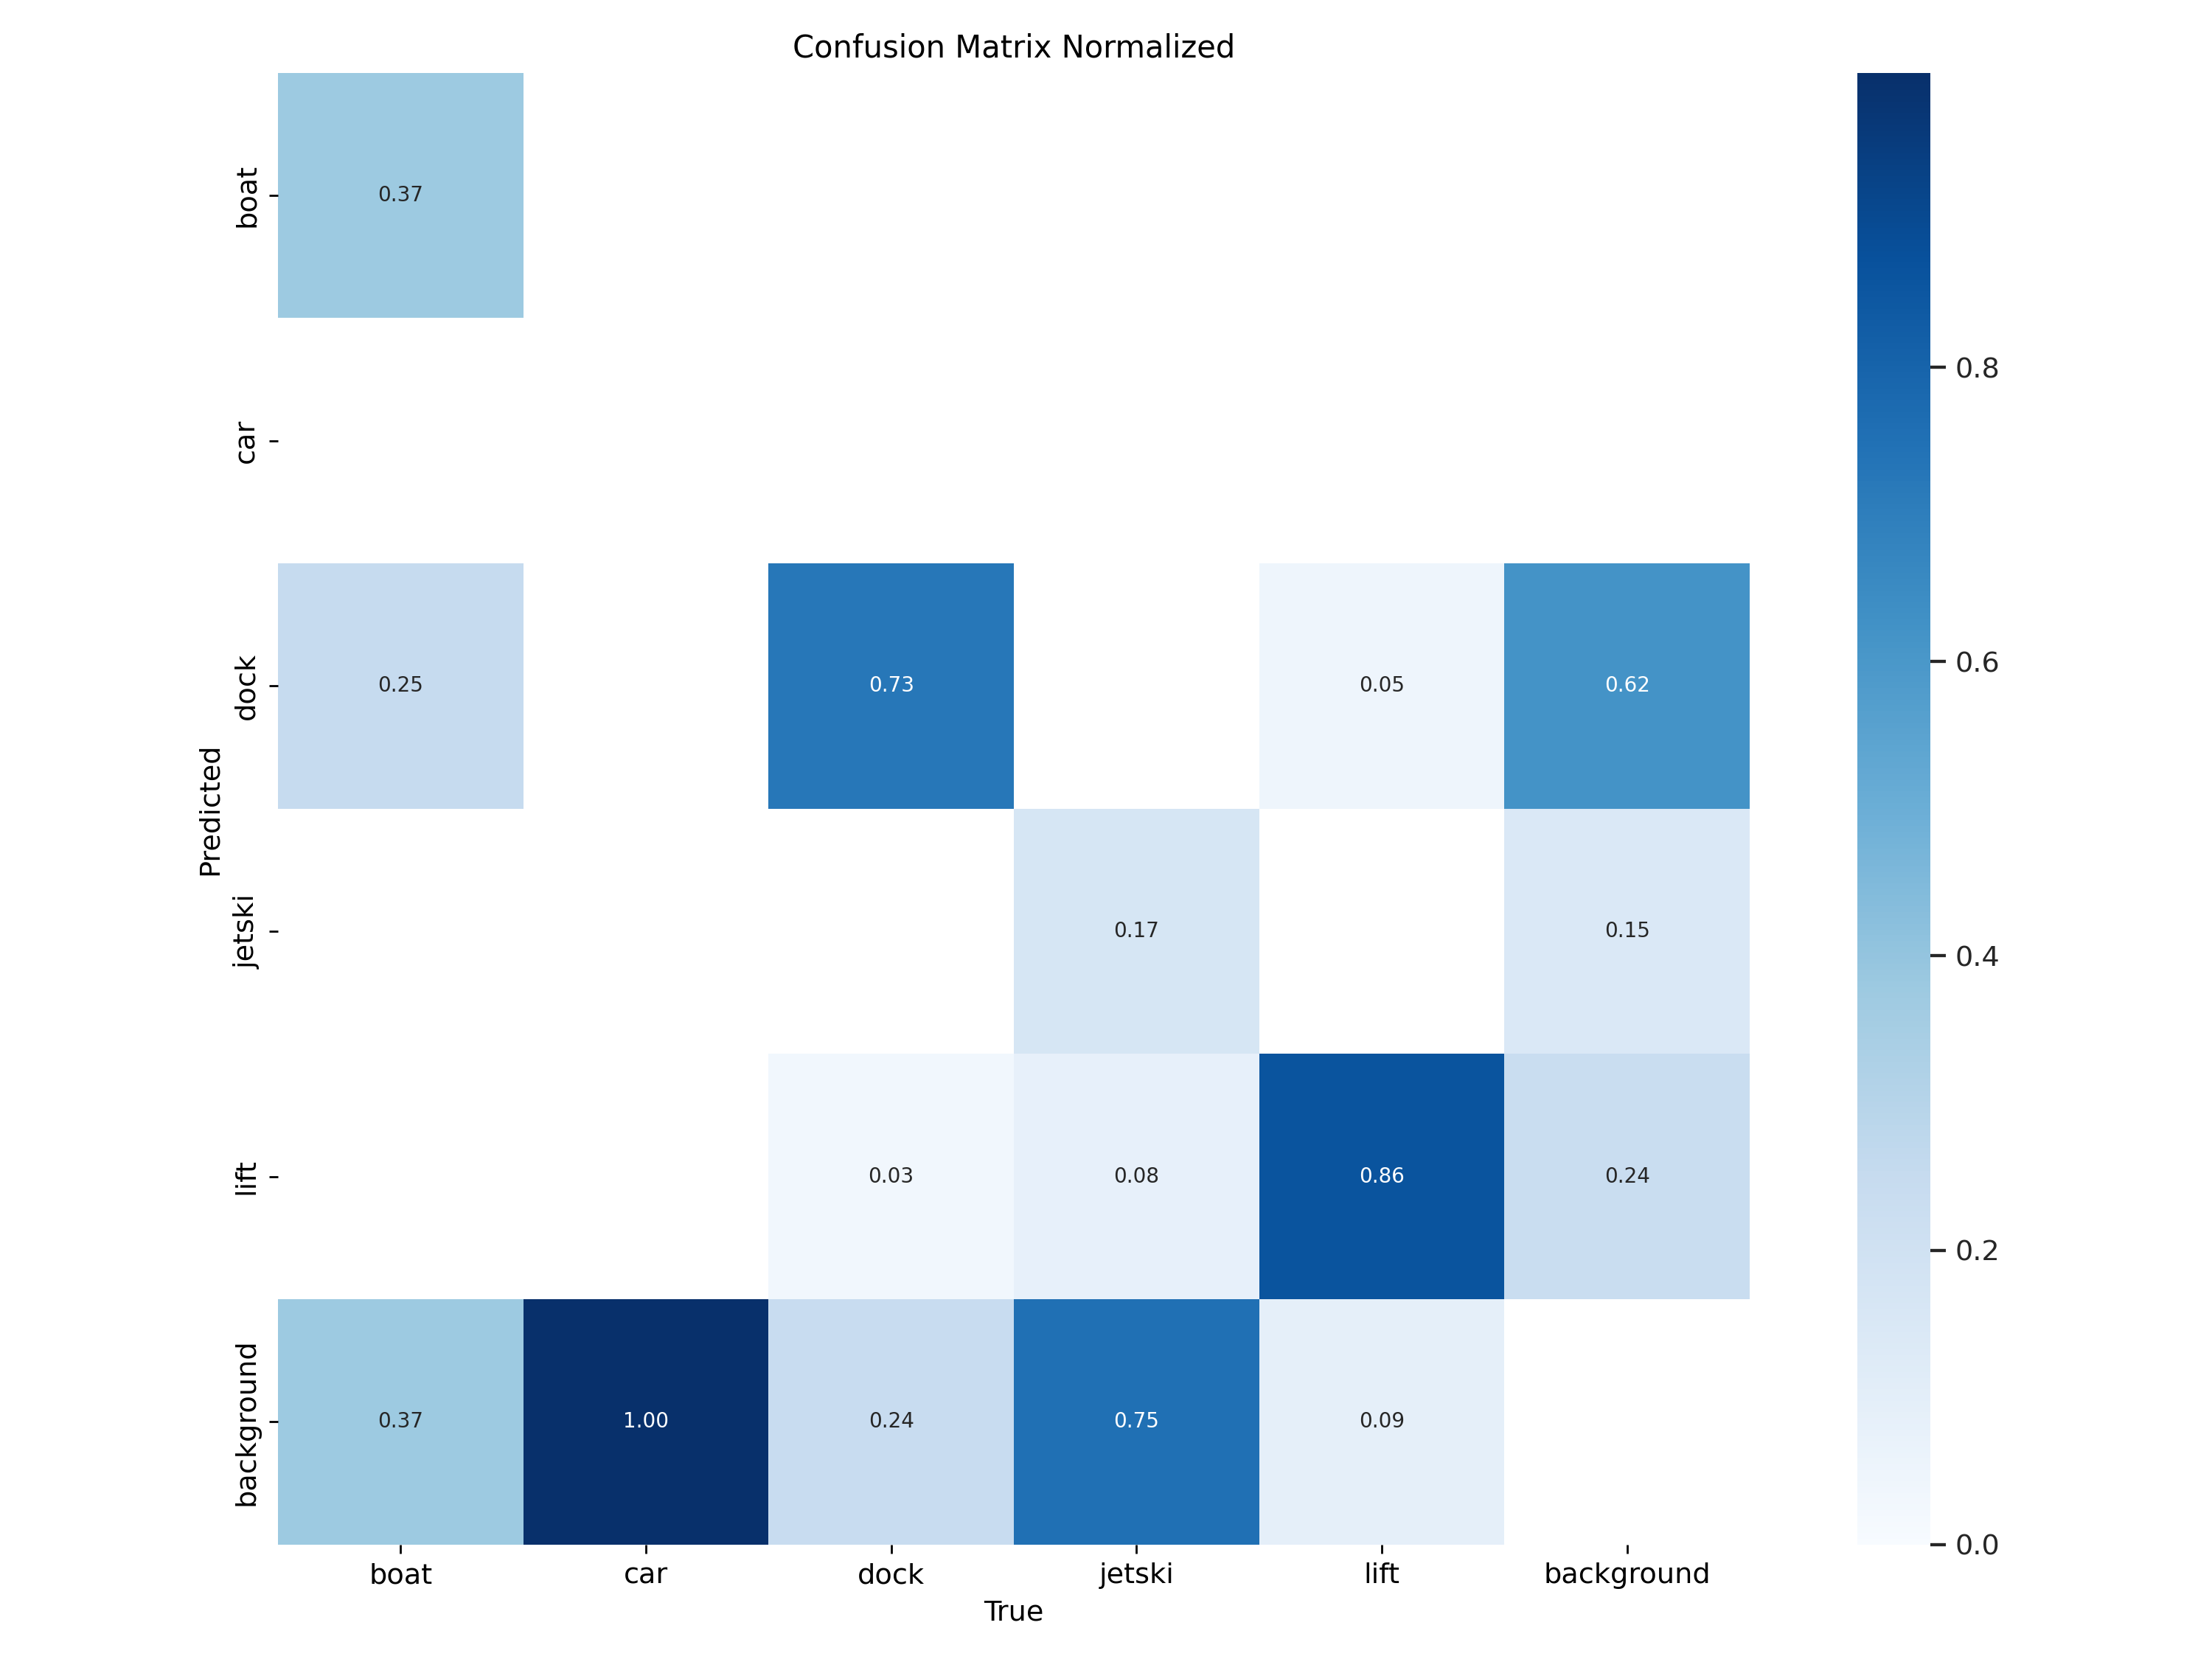

In [ ]:
Image(filename=f'/content/runs/detect/train3/confusion_matrix_normalized.png')

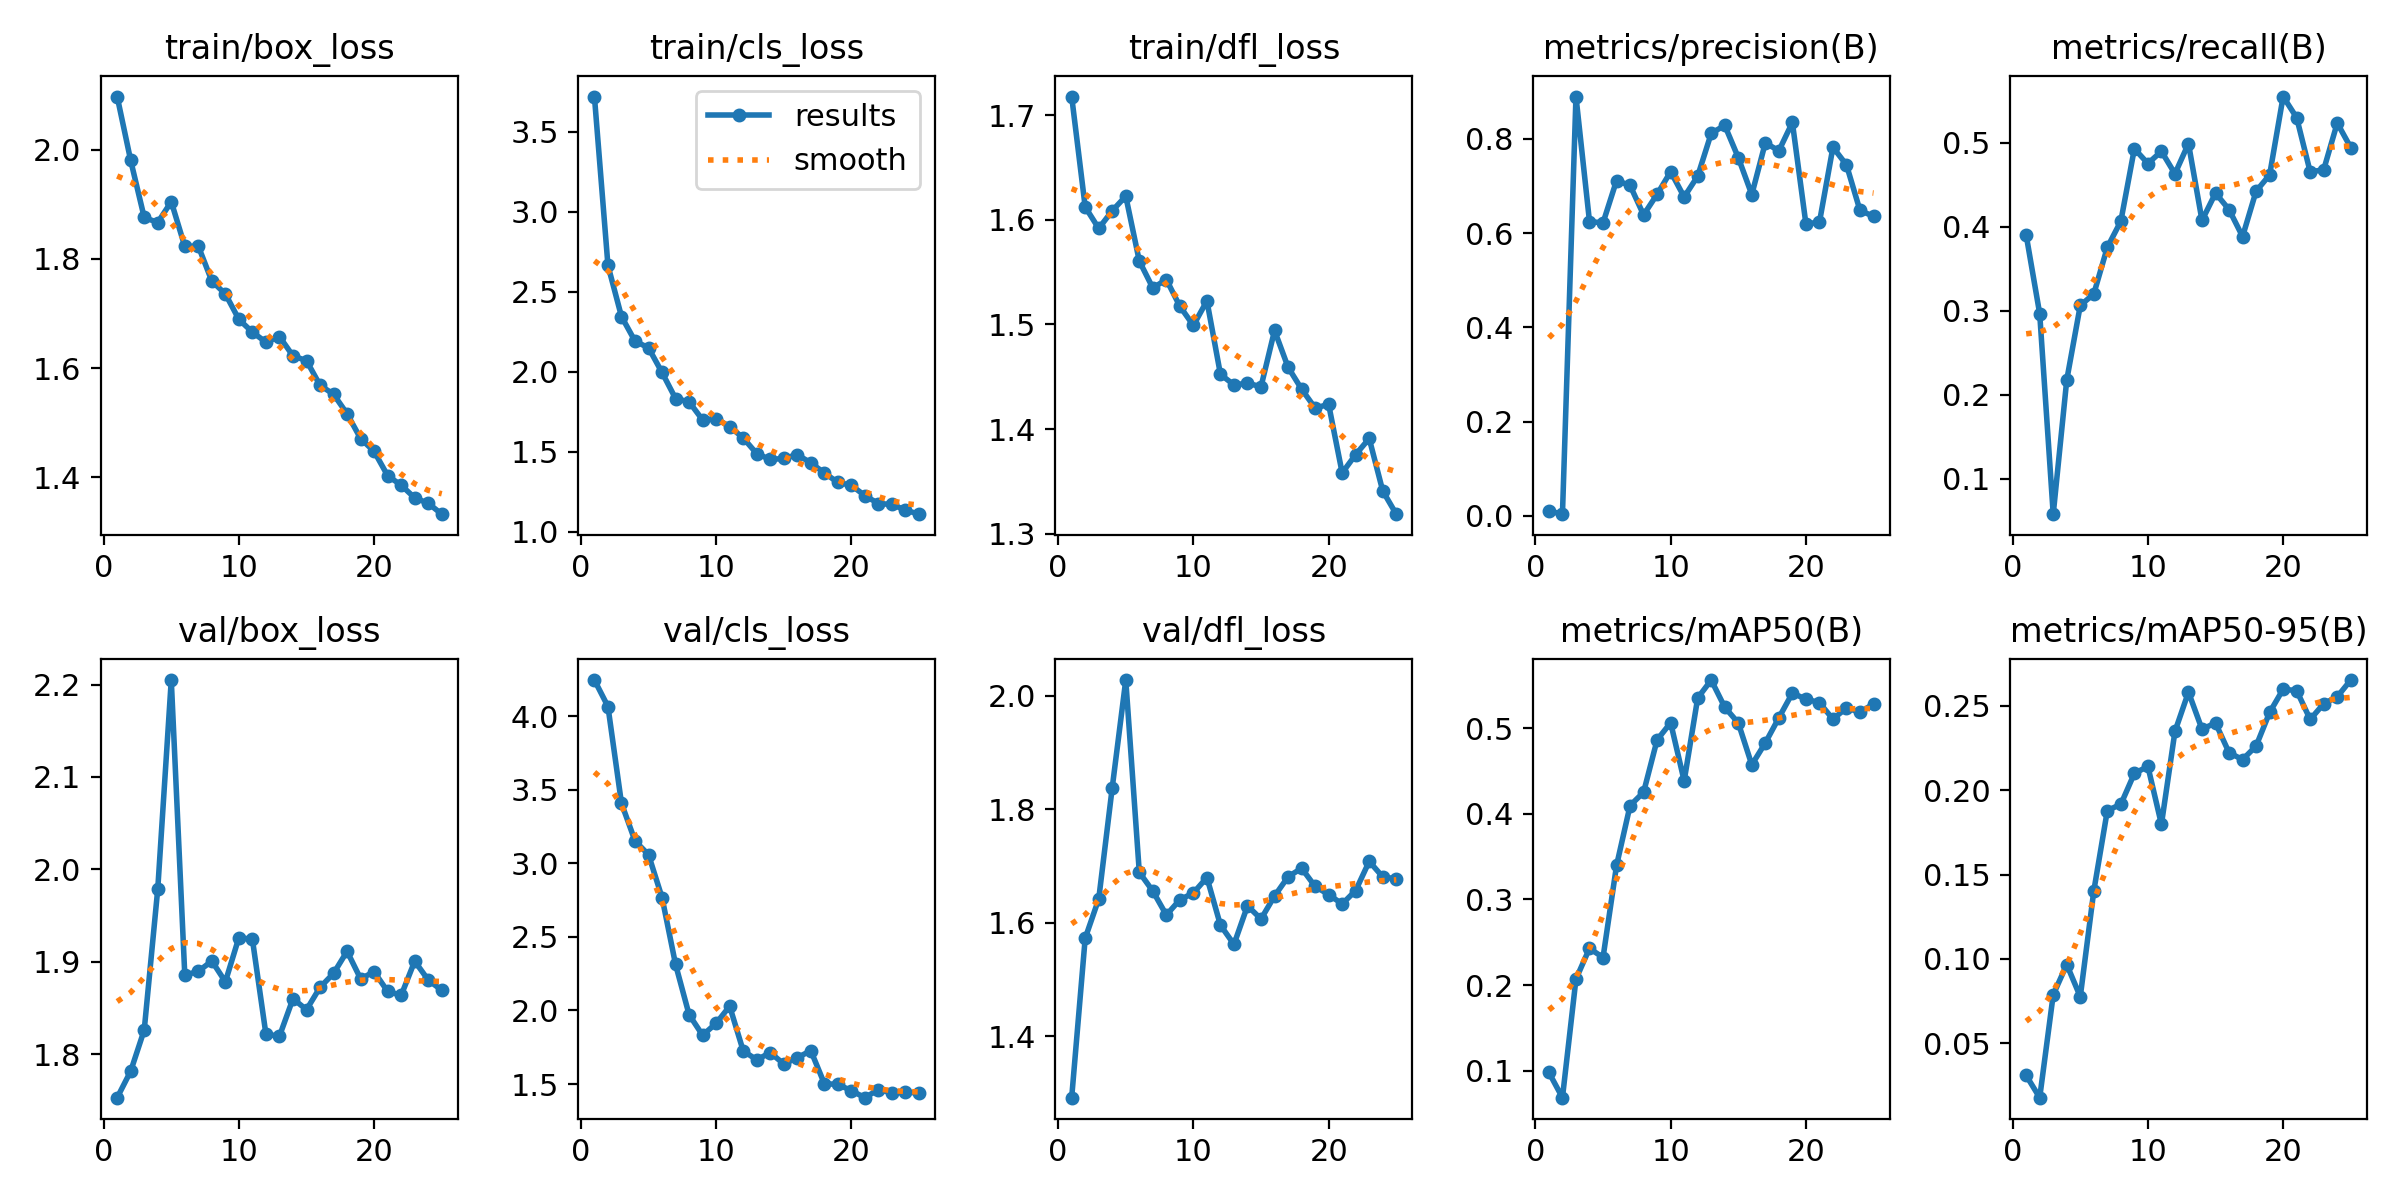

In [ ]:
Image(filename=f'/content/runs/detect/train3/results.png')

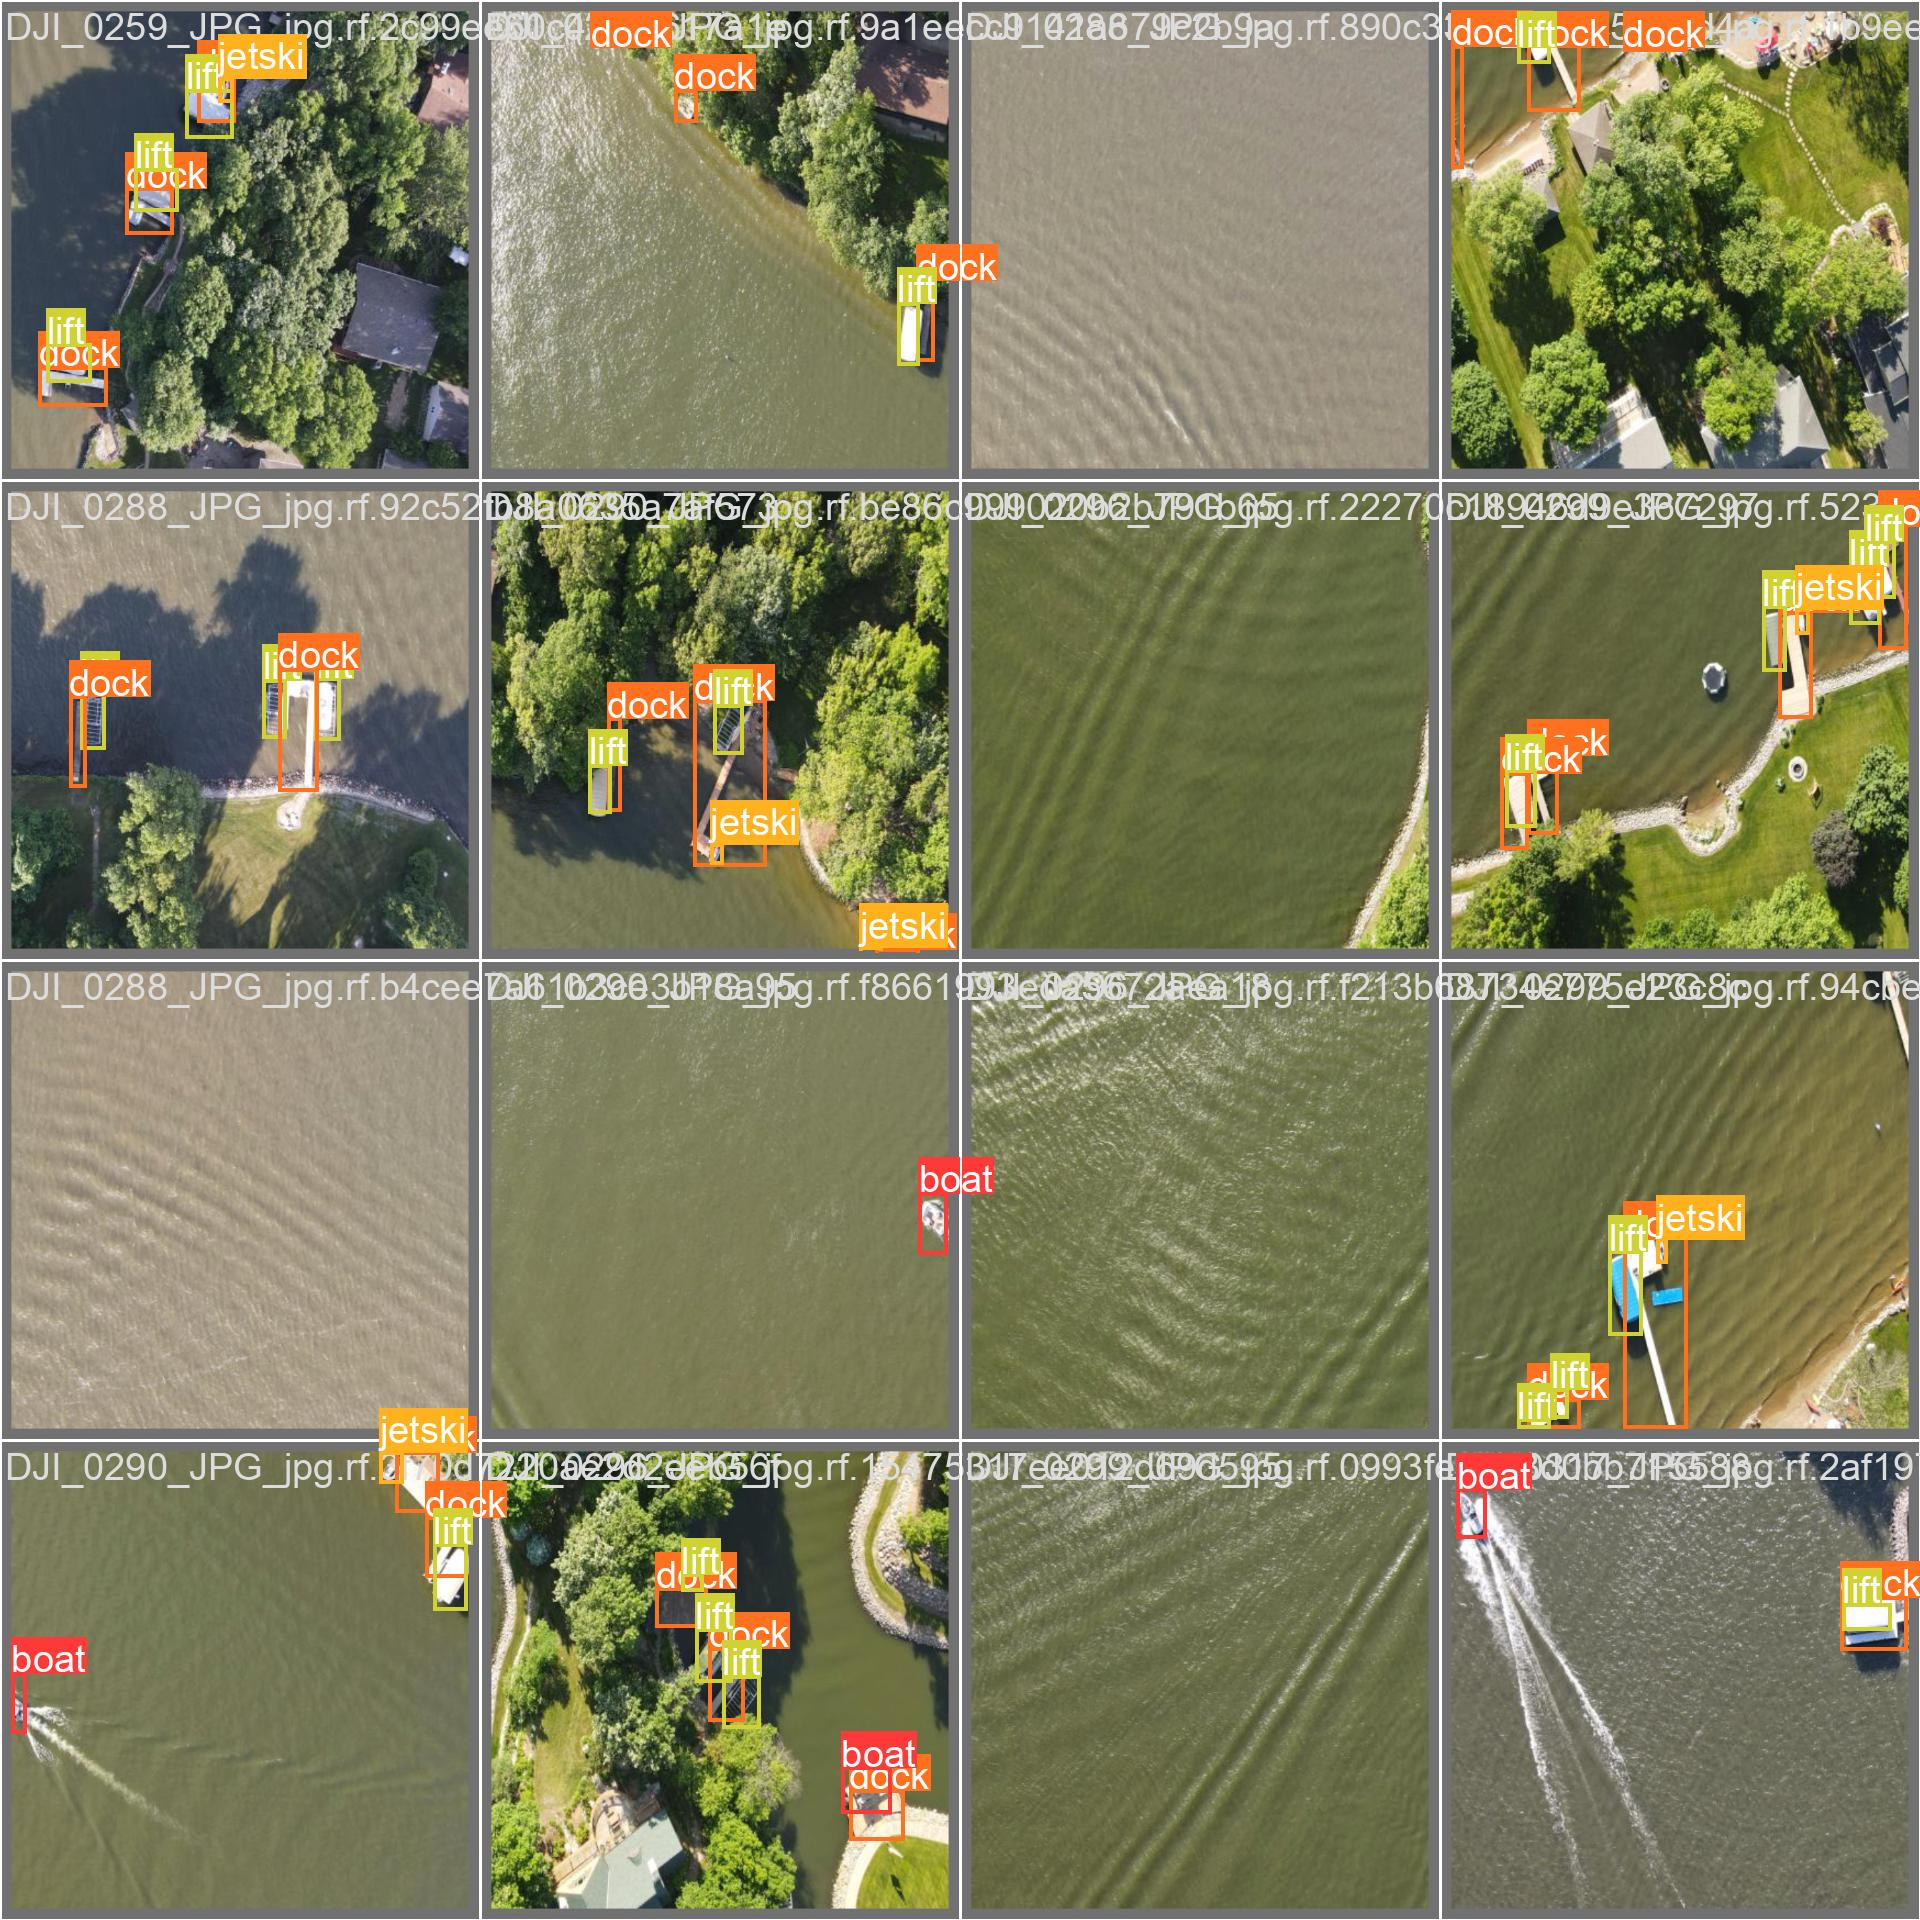

In [ ]:
Image(filename=f'/content/runs/detect/train3/val_batch0_labels.jpg')

In [19]:
!yolo task=detect mode=predict model=/content/runs/detect/train3/weights/best.pt conf=0.25 source="/content/video.mp4"

Görüntülenen çıkış son 5000 satıra kısaltıldı.
video 1/1 (4325/9321) /content/video.mp4: 384x640 2 docks, 8.7ms
video 1/1 (4326/9321) /content/video.mp4: 384x640 1 dock, 6.7ms
video 1/1 (4327/9321) /content/video.mp4: 384x640 (no detections), 7.2ms
video 1/1 (4328/9321) /content/video.mp4: 384x640 (no detections), 7.0ms
video 1/1 (4329/9321) /content/video.mp4: 384x640 (no detections), 6.8ms
video 1/1 (4330/9321) /content/video.mp4: 384x640 1 dock, 7.5ms
video 1/1 (4331/9321) /content/video.mp4: 384x640 1 dock, 7.2ms
video 1/1 (4332/9321) /content/video.mp4: 384x640 1 dock, 7.0ms
video 1/1 (4333/9321) /content/video.mp4: 384x640 1 dock, 7.3ms
video 1/1 (4334/9321) /content/video.mp4: 384x640 (no detections), 6.6ms
video 1/1 (4335/9321) /content/video.mp4: 384x640 (no detections), 7.2ms
video 1/1 (4336/9321) /content/video.mp4: 384x640 (no detections), 6.9ms
video 1/1 (4337/9321) /content/video.mp4: 384x640 (no detections), 7.7ms
video 1/1 (4338/9321) /content/video.mp4: 384x640 (no det

In [20]:
!cp -r /content/runs/detect/predict3 /content/drive/MyDrive/datasets